In [2]:
import cv2 as cv

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [6]:
import tensorflow as tf

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 18s 2us/step


In [12]:
# normalize the data, we'll not scale down the y data because the data is basically just 0123456789
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

<h3> <font color= "yellow">Buildthe model, take an input layer, 2 hidden layers and 1 output layer</font></h3>

<p> <font color= "yellow"> this is basically just saying that we create an ordinary feed forward neural network (just a basic neural network)</font></p>

In [44]:
# define the model, take an input layer, 2 didden layers and 1 output layer
model = tf.keras.models.Sequential()

<p> <font color= "yellow"> Now we are going to add some layers</font></p>

<p> <font color= "yellow"> We use a flatten layer here, we can specify the input shape of the flatten layer to be 28 x 28, so these are all the pixels of each individual image of a handwritten digit and we feed that into the input layer and then this input layer is followed by a dense layer</font></p>

In [45]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

<p> <font color= "yellow"> Dense Layer</font></p>

<p> <font color= "yellow">means that all the neurones are connected to the previous layer and the next layer</font></p>
<p> <font color= "yellow">specify units, chose the number of neurons you we wanna have, the more the more the complicated the layout will be, then specify an activation function </font></p>

In [46]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

<p> <font color= "yellow">then we basically wanna do the same layer again, wanna have two layers that are exactly the same</font></p>

In [47]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

<p> <font color= "yellow">and in the end what we wannna have is an output layer which is again a dense layer, it will have 10 units</font></p>
<p> <font color= "yellow">this activation function here is basically the function that tries to take all the outputs, so basically we have 10 neurons and each neuron has an activation function, how likely it is eg that the digit is 2 or an 8 or a 7, and what softmax does is it adds up or it scales the values down so that they alladd upto 1 so that we get the percentages, the probability of that number being the result the classification </font></p>

In [48]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

<p> <font color= "yellow">So that is how we build the model, we have a flatten layer, 2 dense layers in b2n 2 hidden layers and one dense ouput layer with the softmax function</font></p>

<p> <font color= "yellow">now we just need to complie the model so</font></p>

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<h3> <font color= "yellow">now we fit/train the model</font></h3>

<p> <font color= "yellow">specify epochs, basically means how many times is the model going to see the same data over and over again, how many times are we going to repeat the process</font></p>

In [50]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9244
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1066 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0720 - accuracy: 0.9774


<h3> <font color= "yellow">Evaluate</font></h3>

In [51]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9681


In [52]:
print(f"Accuracy: {accuracy}")
print(f"Loss:  {loss}")

Accuracy: 0.9681000113487244
Loss:  0.10553764551877975


<p> <font color= "yellow">model.save because after we've trained the model, we're going to scan in our own images and feed them into our own neural network to classify our own hand written digits So instead of trining this thing over and over again we're going to save the result and later on load the result</font></p>

In [32]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


INFO:tensorflow:Assets written to: digits.model\assets


<p> <font color= "yellow">Read the images in open cv</font></p>

1/1 [==============================] - 0s 350ms/step
The result is probably: 3


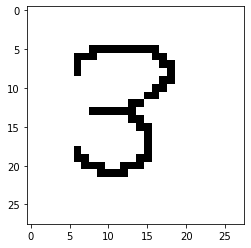

1/1 [==============================] - 0s 21ms/step
The result is probably: 3


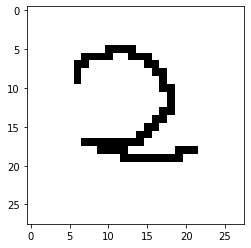

1/1 [==============================] - 0s 22ms/step
The result is probably: 7


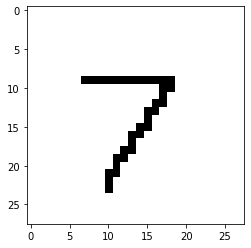

1/1 [==============================] - 0s 21ms/step
The result is probably: 4


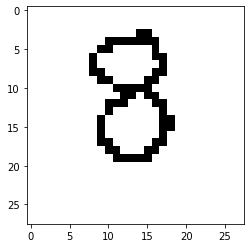

1/1 [==============================] - 0s 21ms/step


In [ ]:
for x in range(1,6):
    img = cv.imread(f"drawnDigits/{x}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The result is probably: {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()